In [11]:

from netCDF4 import Dataset
import numpy as np
#from multiprocessing import Pool

In [12]:
df1 = Dataset('../data/grid.nc')
mask = df1['subset_flag'][:]
lat = df1['lat'][:]
lon = df1['lon'][:]
mask = np.array(mask)
lat = np.array(lat)
lon = np.array(lon)
lat = lat +.125
lon = lon + .125
land = np.where(mask==1)

In [16]:
arr = np.load('../data/test_0.npy')
test = np.array(np.shape(land)[1])

array(2)

In [17]:
test.shape

()

In [13]:
land = np.array(land).T
type(land)

numpy.ndarray

In [15]:
tup1 = np.array(lat[land[:,0]])
tup2 = np.array(lon[land[:,1]])
land_coords = np.column_stack((tup1,tup2))

In [18]:
land_coords[:5,:]

array([[ 83.75, -34.25],
       [ 83.75, -34.  ],
       [ 83.75, -33.75],
       [ 83.5 , -40.75],
       [ 83.5 , -40.5 ]])

In [ ]:
indices = np.arange(14400)
temp = np.zeros((land_coords.shape[0],arr.shape[1]))
for i in indices:
    hor = arr[i*57][0]
    ver = arr[i*57][1]
    if np.all(np.logical_and((hor==land_coords[:,0]),(ver==land_coords[:,1])))==False:


In [ ]:
test = np.arange(20)
test = np.reshape(test,[4,5])
test = np.row_stack((test,[17,16,15,14,13]))
test = np.row_stack((test,[5,4,3,2,1]))
land = np.array([[5,6],[17,16],[10,11]])
temp = np.zeros((land.shape[0],test.shape[1]))
c = 0
for index in range(test.shape[1]):
    lat = test[index][0]
    lon = test[index][1]
    print(np.logical_and((lat==land[:,0]),(lon==land[:,1])))
    if np.any(np.logical_and((lat==land[:,0]),(lon==land[:,1])))==True:
        temp[c] = test[index]
        c+=1
temp

numpy.ndarray

In [14]:
land[0:5,1]

array([582, 583, 584, 556, 557])

In [20]:
arr[0][0]


-89.75

In [14]:
244243/720/1440

0.2355738811728395

: 

In [4]:
import pandas as pd
#Train is from 2003-2011
#test is from 2012-2016
df = pd.read_pickle("../data/train.pkl")

In [5]:
df.shape

(111974400, 38)

In [8]:
land = np.array(land)
land[:,5]

array([ 26, 558])

In [10]:
df.shape

(59097600, 38)

In [12]:

hold = []
for row in range(land.shape[1]):
    i,j = land[:,row]
    temp = np.uint32(np.where(np.logical_and(df['lat']== lat[i],df['lon']==lon[j])))
    hold.append(temp)
df = df.iloc[hold]

ValueError: Buffer has wrong number of dimensions (expected 1, got 3)

In [ ]:
np.save('../data/masked_test.npy',df)

array([ 27, 539])

In [ ]:
df = pd.read_pickle("../data/train.pkl")
hold = []
for row in range(land.shape[1]):
    i,j = land[:,row]
    temp = np.uint32(np.where(np.logical_and(df['lat']== lat[i],df['lon']==lon[j])))
    hold.append(temp)
df = df.iloc[hold]
np.save('../data/masked_train.npy',df)

In [6]:
111974400/1440/720

108.0

In [7]:
720*1440

1036800

In [8]:
144*57

8208

In [9]:
144*108

15552

In [3]:
import pandas as pd 
import numpy as np
test = np.arange(20)
test = np.reshape(test,[4,5])
test = np.row_stack((test,[17,16,15,14,13]))
test = np.row_stack((test,[5,4,3,2,1]))
test

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [17, 16, 15, 14, 13],
       [ 5,  4,  3,  2,  1]])

In [4]:
land = np.array([[5,6],[17,16],[10,11]])
land

array([[ 5,  6],
       [17, 16],
       [10, 11]])

In [5]:
land = np.array([[5,6],[17,16],[10,11]])
temp = np.zeros((land.shape[0],test.shape[1]))
c = 0
for index in range(test.shape[1]):
    lat = test[index][0]
    lon = test[index][1]
    #print(np.logical_and((lat==land[:,0]),(lon==land[:,1])))
    if np.any(np.logical_and((lat==land[:,0]),(lon==land[:,1])))==True:
        temp[c] = test[index]
        c+=1
temp

array([[ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [17., 16., 15., 14., 13.]])

In [10]:
test

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [17, 16, 15, 14, 13],
       [ 5,  4,  3,  2,  1]])

In [82]:
test_mask = np.array([[5,6],[17,16],[10,11]])
test_mask

array([[ 5,  6],
       [17, 16],
       [10, 11]])

In [87]:

rm = []
for row in range(test_mask.shape[0]):
    # print(row)
    # print(test_mask[row])
    i,j = test_mask[row]
    # if(np.logical_and(test['lat']== i,test['lon']==j)=='True'):
    temp = int(np.where(np.logical_and(test['lat']== i,test['lon']==j))[0])
    rm.append(temp)
    # test = test.drop([np.where(np.logical_and(test['lat']== i,test['lon']==j)[0])],axis= 0)
rm
test.iloc[rm]

,lat,lon,time,agb,tmx
1,5,6,7,8,9
4,17,16,15,14,13
2,10,11,12,13,14


In [76]:
test = test.drop(rm,axis=0)

In [77]:
test

,lat,lon,time,agb,tmx
0,0,1,2,3,4
3,15,16,17,18,19
5,5,4,3,2,1


In [1]:
import pandas as pd
#Train is from 2003-2011
#test is from 2012-2016
df = pd.read_pickle("../data/test.pkl")
df.head()

,lat,lon,time,agb,pft_fracCover,sm,pftCrop,pftHerb,pftShrubBD,pftShrubNE,...,dtr,pet,tmx,wet,Biome,precip,Livestock,road_density,topo,pop_density
0,-89.75,-179.75,201201.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99.0,NaN,0.0,NaN,1.0,0.0
1,-89.75,-179.75,201202.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99.0,NaN,0.0,NaN,1.0,0.0
2,-89.75,-179.75,201203.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99.0,NaN,0.0,NaN,1.0,0.0
3,-89.75,-179.75,201204.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99.0,NaN,0.0,NaN,1.0,0.0
4,-89.75,-179.75,201205.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99.0,NaN,0.0,NaN,1.0,0.0


In [39]:
df.tail()

,lat,lon,time,agb,pft_fracCover,sm,pftCrop,pftHerb,pftShrubBD,pftShrubNE,...,dtr,pet,tmx,wet,Biome,precip,Livestock,road_density,topo,pop_density
59097595,90.0,180.0,201605.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
59097596,90.0,180.0,201606.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
59097597,90.0,180.0,201607.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
59097598,90.0,180.0,201608.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
59097599,90.0,180.0,201609.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [ ]:
df.describe()

In [2]:
df.columns

Index(['lat', 'lon', 'time', 'agb', 'pft_fracCover', 'sm', 'pftCrop',
       'pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'Distance_to_populated_areas',
       'fPAR', 'LAI', 'NLDI', 'vod_K_anomalies', 'FPAR_12mon', 'LAI_12mon',
       'Vod_k_anomaly_12mon', 'FPAR_06mon', 'LAI_06mon', 'Vod_k_anomaly_06mon',
       'WDPA_fracCover', 'dtr', 'pet', 'tmx', 'wet', 'Biome', 'precip',
       'Livestock', 'road_density', 'topo', 'pop_density'],
      dtype='object')

In [ ]:
df['pft_fracCover'].describe()

In [ ]:
df['pftCrop'].describe()

In [ ]:
dir(df1['subset_flag'])

In [ ]:
df1['subset_flag'].shape

In [ ]:

plt.plot(df1['subset_flag'],'.')
plt.show()

In [ ]:
df1.variables

In [1]:
59097600/1440/720

57.0

In [3]:
7/23

0.30434782608695654

Creating file with land co-ordinates and saving it inside data

In [18]:
df1 = Dataset('../data/grid.nc')
mask = df1['subset_flag'][:]
lat = df1['lat'][:]
lon = df1['lon'][:]
mask = np.array(mask)
lat = np.array(lat)
lon = np.array(lon)
lat = lat +.125
lon = lon + .125
land = np.where(mask==1)
land = np.array(land).T
tup1 = np.array(lat[land[:,0]])
tup2 = np.array(lon[land[:,1]])
land_coords = np.column_stack((tup1,tup2))
np.save('../data/land_coords.npy',land_coords)

In [6]:
import numpy as np

land = np.load('../data/land_coords.npy')
land[0]

array([ 83.75, -34.25])

In [7]:
land.shape

(244243, 2)

In [1]:
import numpy as np
test = np.load("../data/test_sans_ocean.npy")

In [12]:
test[0:57,0]

array([-55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75,
       -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75,
       -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75,
       -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75,
       -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75,
       -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75,
       -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75, -55.75,
       -55.75])

In [3]:
#Check for structural integrity, but I am immensely tired, so that is  that
#bootstarrping, bagging, bayesian, stacking
#Not a kill me moment, but this is what I am signing up for, 
#Causality, Bayesian, and no money what on Earth am I Thinking
#Best part, I am thinking, still sticking to it
#Good luck to me, ig
#The only way out is by being the next David Silver
#He has Silver in his name, how did I not see this abhi tak

In [4]:
test.shape

(13921851, 38)

In [15]:
flag = True
place = -1
for i in range(test.shape[0]//57):
    lat = test[i*57:(i+1)*57,0]
    lon = test[i*57:(i+1)*57,1]
    _,c = np.unique(lat,return_counts=True)
    if(c==57):
        _,c = np.unique(lat,return_counts=True)
        if(c!=57):
            flag = False
            place = i
            break
    else:
        flag = False
        place = i
        break
print(flag)
print(place)
    

True
-1


In [16]:
import gc
del(test)
gc.collect()

1270

In [ ]:
test = np.load("../data/train_sans_ocean.npy")

In [21]:

for i in range(test.shape[0]//108):
    lat = test[i*108:(i+1)*108,0]
    lon = test[i*108:(i+1)*108,1]
    _,c = np.unique(lat,return_counts=True)
    if(c==108):
        _,c = np.unique(lat,return_counts=True)
        if(c!=108):
            flag = False
            place = i
            break
    else:
        flag = False
        place = i
        break
print(flag)
print(place)

True
-1


In [25]:
test[0,0:2]

array([-55.75, -67.  ])

In [26]:
time_step = 108
coord_train = np.zeros((test.shape[0]//time_step,2))
for i in range(test.shape[0]//time_step):
    coord_train[i]=test[i*time_step,0:2]
np.save('../data/coord_train.npy',coord_train)
del(test)
gc.collect()

1996

In [27]:
test = np.load("../data/test_sans_ocean.npy")

In [28]:
time_step = 57
coord_test = np.zeros((test.shape[0]//time_step,2))
for i in range(test.shape[0]//time_step):
    coord_test[i]=test[i*time_step,0:2]
np.save('../data/coord_test.npy',coord_test)
del(test)
gc.collect()

11

In [4]:
from matplotlib import pyplot
from scipy.interpolate import Akima1DInterpolator
import numpy

In [6]:
%matplotlib inline
def example():
    '''Plot interpolated Gaussian noise.'''
    x = numpy.sort(numpy.random.random(10) * 100)
    y = numpy.random.normal(0.0, 0.1, size=len(x))
    x2 = numpy.arange(x[0], x[-1], 0.05)
    y2 = Akima1DInterpolator(x, y, x2)
    y3 = Akima1DInterpolator(x, y)(x2)
    pyplot.title('Akima interpolation of Gaussian noise')
    pyplot.plot(x2, y2, 'r-', label='akima')
    pyplot.plot(x2, y3, 'b:', label='scipy', linewidth=2.5)
    pyplot.plot(x, y, 'go', label='data')
    pyplot.legend()
    pyplot.show()

In [7]:
example()

TypeError: only integer scalar arrays can be converted to a scalar index

In [8]:
import numpy as np

from scipy.interpolate import Rbf, InterpolatedUnivariateSpline

import matplotlib.pyplot as plt

In [9]:
# setup data

x = np.linspace(0, 10, 9)

y = np.sin(x)

xi = np.linspace(0, 10, 101)

In [16]:
xi

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [17]:
# use fitpack2 method

ius = InterpolatedUnivariateSpline(x, y)
print(ius)

yi = ius(xi)

Text(0.5, 1.0, 'Interpolation using univariate spline')

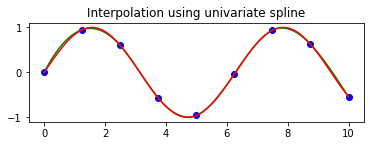

In [11]:
plt.subplot(2, 1, 1)

plt.plot(x, y, 'bo')

plt.plot(xi, yi, 'g')

plt.plot(xi, np.sin(xi), 'r')

plt.title('Interpolation using univariate spline')

In [12]:
# use RBF method

rbf = Rbf(x, y)

fi = rbf(xi)


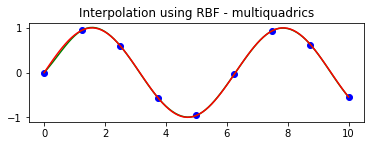

In [13]:
plt.subplot(2, 1, 2)

plt.plot(x, y, 'bo')

plt.plot(xi, fi, 'g')

plt.plot(xi, np.sin(xi), 'r')

plt.title('Interpolation using RBF - multiquadrics')

plt.show()

In [1]:
import numpy as np
#train =  np.load("/home/npande/Desktop/furnaces/data/train_sans_ocean.npy")
train =  np.load("/home/npande/data/train_sans_ocean.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/home/npande/data/train_sans_ocean.npy'

In [1]:
import numpy as np
x = np.linspace(-2,2,100)
y = np.linspace(-3,1,100)
xv,yv = np.meshgrid(x,y)

In [6]:
f = np.sin(xv)+np.cos(yv)

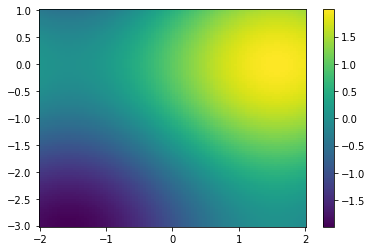

In [10]:
import matplotlib.pyplot as plt
#plt.style.use(['science','notebook','dark_background'])
plt.pcolormesh(xv,yv,f)
plt.colorbar()
plt.show()

In [30]:
import pandas as pd
df = pd.read_csv('../data/annual_mean_base.csv')

In [12]:
df.head()

,pftCrop,pftShrubBD,ign,faPAR,precip,temp_max
0,0.00037,0.014883,0.0,0.355189,823.126289,8.241667
1,0.00037,0.014883,0.0,0.358491,878.642670,9.066667
2,0.00037,0.014883,0.0,0.213130,738.668304,8.233334
3,0.00037,0.014883,0.0,0.201222,785.473183,8.633333
4,0.00037,0.014883,0.0,0.189196,1010.882393,8.033333


In [4]:
from pgmpy.estimators import PC
from pgmpy.models import BayesianModel
import numpy as np


In [6]:
# Define model structure
model = BayesianModel([('faPAR', 'ign'), ('temp_max', 'ign'), ('pftCrop', 'ign'), ('pftShrucBD', 'ign'), ('precip', 'ign')])

# Learn model structure from data
est = PC(model)
model = est.estimate(significance_level=0.05, data=df)

# Print model structure
print(model.edges())

AttributeError: 'BayesianModel' object has no attribute 'columns'

In [31]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

In [32]:
df = df.astype('float16')

In [33]:
hc = HillClimbSearch(df)

In [15]:
best_model = hc.estimate(scoring_method=BicScore(df))

  0%|          | 0/1000000 [00:00<?, ?it/s]/home/npande/furnaces-main/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:161: PerformanceWarning: The following operation may generate 168908024216 cells in the resulting pandas object.
  data.groupby([variable] + parents).size().unstack(parents)
  0%|          | 0/1000000 [02:45<?, ?it/s]


MemoryError: Unable to allocate 1.23 TiB for an array with shape (230476, 732866) and data type float64

In [17]:
df = df.astype('float16')

In [18]:
df.dtypes

pftCrop       float16
pftShrubBD    float16
ign           float16
faPAR         float16
precip        float16
temp_max      float16
dtype: object

In [38]:
from pgmpy.estimators import K2Score
best_model = hc.estimate(scoring_method=K2Score(df))

  0%|          | 1/1000000 [01:32<25641:14:05, 92.31s/it]/home/npande/furnaces-main/env/lib/python3.10/site-packages/pgmpy/estimators/base.py:161: PerformanceWarning: The following operation may generate 14732404700 cells in the resulting pandas object.
  data.groupby([variable] + parents).size().unstack(parents)


: 

: 

In [36]:
best_model.edges

OutEdgeView([])

In [22]:
df.head()

,pftCrop,pftShrubBD,ign,faPAR,precip,temp_max
0,0.00037,0.014885,0.0,0.355225,823.0,8.242188
1,0.00037,0.014885,0.0,0.358398,878.5,9.070312
2,0.00037,0.014885,0.0,0.213135,738.5,8.234375
3,0.00037,0.014885,0.0,0.201172,785.5,8.632812
4,0.00037,0.014885,0.0,0.189209,1011.0,8.031250


In [24]:
df['ign'].max()

299.0

In [25]:
hc

In [26]:
dir(hc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_collect_state_names',
 '_legal_operations',
 'complete_samples_only',
 'data',
 'estimate',
 'independencies',
 'state_counts',
 'state_names',
 'use_cache',
 'variables']

In [28]:
hc.variables

['pftCrop', 'pftShrubBD', 'ign', 'faPAR', 'precip', 'temp_max']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../data/annual_mean_base.csv')
data.columns

ModuleNotFoundError: No module named 'matplotlib'

In [1]:
import os
import xarray as xr

# Get the current directory
dir = '/home/npande/shares/climers/Datapool/ECMWF_reanalysis/01_raw/ERA5-Land/datasets/images/2022/'

# Create an empty list to store all the datasets
ds_list = []

# Loop through all folders between 001 and 365
for i in range(1, 366):
    # Get the folder name
    folder_name = str(i).zfill(3)
    
    # Check if the folder exists
    if os.path.exists(os.path.join(dir, folder_name)):
        # Change to the folder
        os.chdir(os.path.join(dir, folder_name))
        
        # Get the file ending with '1200.nc'
        file_name = [f for f in os.listdir() if f.endswith('1200.nc')][0]
        print(file_name)
        # Load the file using NetCDF
        ds = xr.open_dataset(file_name)
        
        # Take the following variables: swvl1, tp, strd, slt1, la1_hv+lai_lv, t2m
        ds_new = ds[['swvl1', 'tp', 'strd', 'stl1', 'lai_hv','lai_lv', 't2m']]
        
        # Append the dataset to the list
        ds_list.append(ds_new)
        
        # Change back to the original directory
        os.chdir(dir)

# Concatenate all the datasets along the time dimension
ds_concat = xr.concat(ds_list, dim='time')

# Save the concatenated dataset as a new file
ds_concat.to_netcdf('./data/stacked.nc')

ERA5-LAND_AN_20220101_1200.nc
ERA5-LAND_AN_20220102_1200.nc
ERA5-LAND_AN_20220103_1200.nc
ERA5-LAND_AN_20220104_1200.nc
ERA5-LAND_AN_20220105_1200.nc
ERA5-LAND_AN_20220106_1200.nc
ERA5-LAND_AN_20220107_1200.nc
ERA5-LAND_AN_20220108_1200.nc
ERA5-LAND_AN_20220109_1200.nc
ERA5-LAND_AN_20220110_1200.nc
ERA5-LAND_AN_20220111_1200.nc
ERA5-LAND_AN_20220112_1200.nc
ERA5-LAND_AN_20220113_1200.nc
ERA5-LAND_AN_20220114_1200.nc
ERA5-LAND_AN_20220115_1200.nc
ERA5-LAND_AN_20220116_1200.nc
ERA5-LAND_AN_20220117_1200.nc
ERA5-LAND_AN_20220118_1200.nc
ERA5-LAND_AN_20220119_1200.nc
ERA5-LAND_AN_20220120_1200.nc
ERA5-LAND_AN_20220121_1200.nc
ERA5-LAND_AN_20220122_1200.nc
ERA5-LAND_AN_20220123_1200.nc
ERA5-LAND_AN_20220124_1200.nc
ERA5-LAND_AN_20220125_1200.nc
ERA5-LAND_AN_20220126_1200.nc
ERA5-LAND_AN_20220127_1200.nc
ERA5-LAND_AN_20220128_1200.nc
ERA5-LAND_AN_20220129_1200.nc
ERA5-LAND_AN_20220130_1200.nc
ERA5-LAND_AN_20220131_1200.nc
ERA5-LAND_AN_20220201_1200.nc
ERA5-LAND_AN_20220202_1200.nc
ERA5-LAND_

PermissionError: [Errno 13] Permission denied: '/shares/npande/climers/Datapool/ECMWF_reanalysis/01_raw/ERA5-Land/datasets/images/2022/data/stacked.nc'

In [2]:
ds_concat.to_netcdf('/home/npande/furnaces-main/data/stacked.nc')

In [4]:
clim = xr.open_dataset('/home/npande/furnaces-main/data/ESA-CCI-SOILMOISTURE-LAND_AND_RAINFOREST_MASK-fv06.2.nc')

In [5]:
mask = clim['climate_class'][:]

In [6]:
import numpy as np
test = np.where(mask<3)

In [7]:
test

(array([ 18,  18,  18, ..., 719, 719, 719]),
 array([ 115,  116,  117, ..., 1437, 1438, 1439]))

In [9]:
lat = clim['lat'][:]
lon = clim['lon'][:]

In [10]:
lat

<xarray.DataArray 'lat' (lat: 720)>
array([-89.875, -89.625, -89.375, ...,  89.375,  89.625,  89.875])
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    long_name:      Latitude
    units:          degree_north
    standard_name:  latitude
    valid_range:    [-90.  90.]

In [13]:
mask_lat = lat[test[0]]

In [14]:
len(test[0])

729947

In [15]:
mask_lat.shape

(729947,)

In [16]:
mask_lon = lon[test[1]]

In [2]:
import numpy as np
arr = np.load('../data/custom_median.npy')
arr.shape

(26378244, 30)

In [3]:
col = np.load('../data/column_names.npy')
lat = np.arange(90,-90,-0.25)
lon = np.arange(-180,180,0.25)
gfed = np.load('../data/gfed_regions.npy')
shaf = np.where(gfed == 9)

In [4]:
shaf_lat = lat[shaf[0]]
shaf_lon = lon[shaf[1]]

In [5]:
import pandas as pd
df = pd.DataFrame(arr,columns=col)
df = df.drop(df['lon 1']<shaf_lon.min())
df = df.drop(df['lon 1']>shaf_lon.max())
df = df.drop(df['lat 0']<shaf_lat.min())
df = df.drop(df['lat 0']>shaf_lat.max())

In [2]:
import numpy as np
arr = np.load('../data/custom_median.npy')
arr.shape

(26378244, 30)

In [3]:
arr.shape[0]/108

244243.0

In [16]:
year = arr[:,[0,1,15]]
year.shape

(26378244, 3)

In [17]:
year = year[:244243*12,:]

year.shape

(2930916, 3)

In [18]:
year= np.reshape(year,(-1,12,3))

In [19]:
year.shape

(244243, 12, 3)

In [20]:
avg = np.mean(year, axis = 1)

In [21]:
avg.shape

(244243, 3)

In [22]:
np.save('../data/ign',avg)